In [517]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt

In [518]:
#inp1 = np.array([[1,2,3],[4,5,6],[7,8,9],[4,3,6],[7,8,9],[0,5,6]])
#q_point = np.array([[5,7,2],[10,20,30]])
#q_point

data = pd.read_csv('/home/ganesh/Downloads/kodaguAllYearRainDam.csv')

In [519]:
data

,RCDATE,Present Storage(TMC),Reservoir Level(TMC),Inflow,Outflow,MADIKERI,SOMWARPET,VIRAJPET
0,2011-06-01,3.800,2836.460,15.0,0.0,0.6250,0.083333,0.000000
1,2011-06-02,3.790,2836.410,27.0,0.0,14.2500,5.166667,17.333333
2,2011-06-03,3.800,2836.450,63.0,0.0,44.2500,10.666667,46.916667
3,2011-06-04,3.810,2836.580,172.0,0.0,40.2500,14.500000,33.666667
4,2011-06-05,3.820,2836.650,100.0,0.0,34.2500,9.166667,34.666667
...,...,...,...,...,...,...,...,...
1219,2018-10-27,5.500,2848.140,140.0,1250.0,0.0000,0.036667,0.056667
1220,2018-10-28,5.390,2847.640,136.0,1287.5,0.0000,0.000000,0.000000
1221,2018-10-29,5.280,2847.140,132.0,1325.0,0.0000,0.000000,0.016667
1222,2018-10-30,5.145,2846.525,131.0,1425.0,0.0375,0.016667,0.063333


In [524]:
colA = np.array(data.loc[:,['MADIKERI','SOMWARPET','VIRAJPET']])
colB = np.array(data['Inflow'])

l,b = np.shape(colA)
l,b
print(np.shape(colA))
print(np.shape(colB))
colA
colB = colB.T
t_vals = []
for i in range(l):
    a = colA[i]
    b = colB[i]
    t_vals.append((a,b))
#t_vals = np.array(t_vals)
print(t_vals[1][0])
np.shape(t_vals)


(1224, 3)
(1224,)
[14.25        5.16666667 17.33333333]


(1224, 2)

In [521]:
len(colA[0])

3

In [522]:
q_point = np.array([29.932934,4.1892731,27.1823912])

In [523]:
inp1 = colA

In [433]:
def cal_eucledian_distance(q_point,inp1):
    #print(q_point,inp1)
    return np.linalg.norm(q_point - inp1)

In [434]:
def knn(inp1,k,q_point):
    tup_val = []
    distance_list = [cal_eucledian_distance(q_point,inp1[i]) for i in range(len(inp1))]
    #print(distance_list)
    for i in range(len(inp1)):
        tup_val.append((distance_list[i],inp1[i]))
    #print("---------------------------")
    #print(tup_val)
    index=0
    sorted_values = sort(tup_val)
    neighbours = sorted_values[:k]
    return neighbours

In [435]:
def last(n):
    return n[m]

In [436]:
def sort(tuples):
    return sorted(tuples,key=last)

In [444]:
vals = knn(inp1,5,q_point)
print(vals)
len(vals)

[(3.25699431908885, array([27.725,  3.95 , 24.8  ])), (5.811509521890287, array([34.6275    ,  5.68333333, 30.265     ])), (7.528627818321159, array([27.35      , 11.16666667, 28.33333333])), (7.706105006142089, array([34.5       ,  9.08333333, 31.        ])), (7.884201319313577, array([30.25      , 10.91666667, 23.08333333]))]


5

In [438]:
print(vals[0])

(3.25699431908885, array([27.725,  3.95 , 24.8  ]))


In [439]:
near_vals = []
for i in range(len(vals)):
    near_vals.append(vals[i][1])

In [440]:
near_vals = np.array(near_vals)
near_vals[0]

array([27.725,  3.95 , 24.8  ])

In [441]:
np.shape(near_vals)

(5, 3)

In [447]:
len(near_vals) 

5

In [595]:
reg_val = []
mcolB = []
mcolA = []
for i in range(len(t_vals)):
    if t_vals[i][0] in near_vals:
        reg_val.append((t_vals[i][0],t_vals[i][1]))
        mcolA.append(t_vals[i][0])
        mcolB.append(t_vals[i][1])
        #print("True")
#print(q_point)
#print(reg_val)
size_b = len(mcolB)
mcolB = np.array(mcolB)
mcolA = np.array(mcolA)
mcolB = mcolB.reshape((size_b,1))
max_val = np.max(mcolB)
min_val = np.min(mcolB)
print(np.shape(mcolB))
print(np.shape(mcolA))
print(mcolA1[0])
print(mcolB1)

(7, 1)
(7, 3)
[34.5         9.08333333 31.        ]
[ 268.  220.  593. 1906. 2178. 1942.  914.]


In [543]:
normalized_tar_val = normalize(mcolB,max_val,min_val)
print(normalized_tar_val)
print(np.max(normalized_tar_val))
normalized_tar_val = np.array(normalized_tar_val)
normalized_tar_val = normalized_tar_val.reshape(size_b,1)
print(np.shape(normalized_tar_val))

[0.024514811031664963, 0.0, 0.19050051072522983, 0.8610827374872319, 1.0, 0.8794688457609806, 0.35444330949948927]
1.0
(7, 1)


In [469]:
inp_matrix = mcolA

In [510]:
import numpy as np

In [607]:
def normalize(mcolB, max_val, min_val):
    #print(mcolB)
    n_val = []
    for i in range(len(mcolB)):
        n_val.append(float(((mcolB[i] - min_val) / (max_val - min_val))))
    return n_val
    #return ( (point - m) / () )

In [608]:
def lwr(inp, out, k):
    m,n = np.shape(inp)
    ypred = np.zeros(m)
    
    for i in range(m):
        ypred[i] = inp[i] * beta(inp[i], inp, out, k)
    #print("The final prediction is :",ypred)
    return ypred
    

In [609]:
def beta(point, inp, out, k):
    wt = kernal(point, inp, k)
    #print("The weight of betas is",wt)
    beta_val = (inp.T * (wt*inp)).I * (inp.T * wt * out)
    #print("The weight is beta value is",beta_val)
    
    return beta_val

In [610]:
def kernal(point, inp, k):
    l,b = np.shape(inp)
    weights = np.mat(np.eye((l)))
    #print(weights)
    
    for i in range(l):
        diff = point - inp[i]
        #diff = np.array(diff)
        #print(len(diff))
        diff = diff.reshape(len(diff),1)
        #print(np.shape(diff))
        #diff1 = diff.T
        #print(np.shape(diff.T))
        a = np.dot(diff.T,diff)
        
        #print(a)
        #print(np.shape(a))
        weights[i,i] = np.exp(np.dot(diff.T,diff) / (-2.0 * (k**2)))
        #print(weights[i,i])
    #print("The weights of",i,'is',weights[i,i])
    
    return weights

[ 268.  220.  593. 1906. 2178. 1942.  914.]
[1106.75871948  895.64445685  649.51079874 1285.80015914 1251.20417202
 1905.67154253 1095.46727671]
(7, 1)
(7, 3)


ValueError: x and y must be the same size

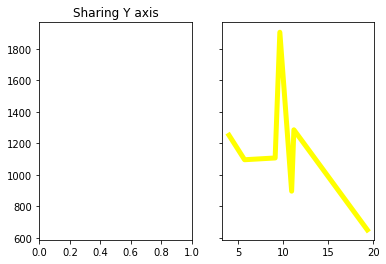

In [625]:
ypred = lwr(inp_matrix, mcolB, 10)
print(mcolB1)
print(ypred)
print(np.shape(mcolB))

xsort = inp_matrix.copy()
xsort.sort(axis = 0)
print(np.shape(mcolA))

f, (ax1, ax2) = pt.subplots(1, 2, sharey=True)
pt.plot(xsort[:,1],ypred[mcolA[:,1].argsort(0)],color = 'yellow',linewidth = 5)#ypred[X[:, 1].argsort(0)]
ax1.set_title('Sharing Y axis')
ax2.scatter(mcolA, mcolB)

pt.scatter(mcolA,mcolB,color = 'blue')
pt.plot(xsort[:,1],ypred[mcolA[:,1].argsort(0)],color = 'yellow',linewidth = 5)#ypred[X[:, 1].argsort(0)]
#pt.plot(xsort[:, 1], ypred[X[:, 1].argsort(0)], color='yellow', linewidth=5)
pt.xlabel('MADIKERI')
pt.ylabel('Inflow')